**Group 7 (Section 009)**
=

GitHub link: https://github.com/ilin27/dsci-100-group-project/tree/main 
-

Title: 
**Predicting Subscription Status in MineCraft - The Roles of Age and Play Time** 
-

## **Introduction:**

**Background information:** 
- Frank Wood, an associate professor of computer science at UBC, is leading a research group in learning about players' actions in a MineCraft server that they have created. 

**Questions:**
- One question they asked was: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**
- Our group is interested in answering the following question: **"Can the number of hours the players spend on the server (played_hours) and the age of the player (Age) predict if a player will subscribe (subscribe) to a game-related newletter based on the players.csv dataset?"**

**Dataset description:**
- We will be using the players.csv dataset.
- There are 196 observations in this dataset.
- The dataset contains the following variables: **experience** (one of Amateur, Regular, Pro, Veteran), **subscribe** (whether or not a player subsribes to the newsletter), **hashedEmail** (player email), **played_hours** (hours player spent on the MineCraft server), **name** (player name), **gender** (one of Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say), **Age** (player age).
- We will be focusing on the following variables for our analysis: **Age**, **played_hours**, **subscribe**.

## **Methods & Results:**

Load Data 
-

In [3]:
# Download library
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

In [4]:
# Loading the dataset
players <- read_csv("https://raw.githubusercontent.com/ilin27/dsci-100-group-project/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Wrangling and cleaning the data
-

In [5]:
players <- players |>
    select(Age, played_hours, subscribe) |>
    mutate(Age = as.numeric(Age), 
           played_hours = as.numeric(played_hours),
           subscribe = as.factor(subscribe))
head(players)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


The quantitative variables "Age" and "played_hours" will be used to predict a gamer's subscription status as one of the two categories: "TRUE" or "FALSE", using K-NN classification. Therefore, the dataframe above is simplified to only include the two predictor variables and the reponse variable in question. 

In [6]:
# Checking for NA values
nrow(filter(players, is.na(Age)))
nrow(filter(players, is.na(played_hours)))

[1] 2

[1] 0

There are missing Age values, so we will remove them.

In [7]:
clean_players <- players |>
    filter(!is.na(Age))

Summary of Dataset
-

In [8]:
summary(clean_players)

      Age         played_hours     subscribe  
 Min.   : 9.00   Min.   :  0.000   FALSE: 52  
 1st Qu.:17.00   1st Qu.:  0.000   TRUE :142  
 Median :19.00   Median :  0.100              
 Mean   :21.14   Mean   :  5.905              
 3rd Qu.:22.75   3rd Qu.:  0.600              
 Max.   :58.00   Max.   :223.100              

In [9]:
clean_players_sd <- clean_players |>
    summarize(Age_sd = sd(Age), 
              played_hours_sd = sd(played_hours))
clean_players_sd

Age_sd,played_hours_sd
<dbl>,<dbl>
7.389687,28.49793


**Table 1: Mean and Median of Age and played_hours**

|              | mean   | median | standard deviation |
|---|---|---|---|
| Age          | 21.14  | 19.00  | 7.39   |
| played_hours | 5.905  | 0.100  | 28.50  |

Exploratory Data Visualizations
-

In [10]:
# library(RColorBrewer)
# display.brewer.all(colorblindFriendly = TRUE)

#### **Graph 1: Age vs Hours Played with Subscription Status**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


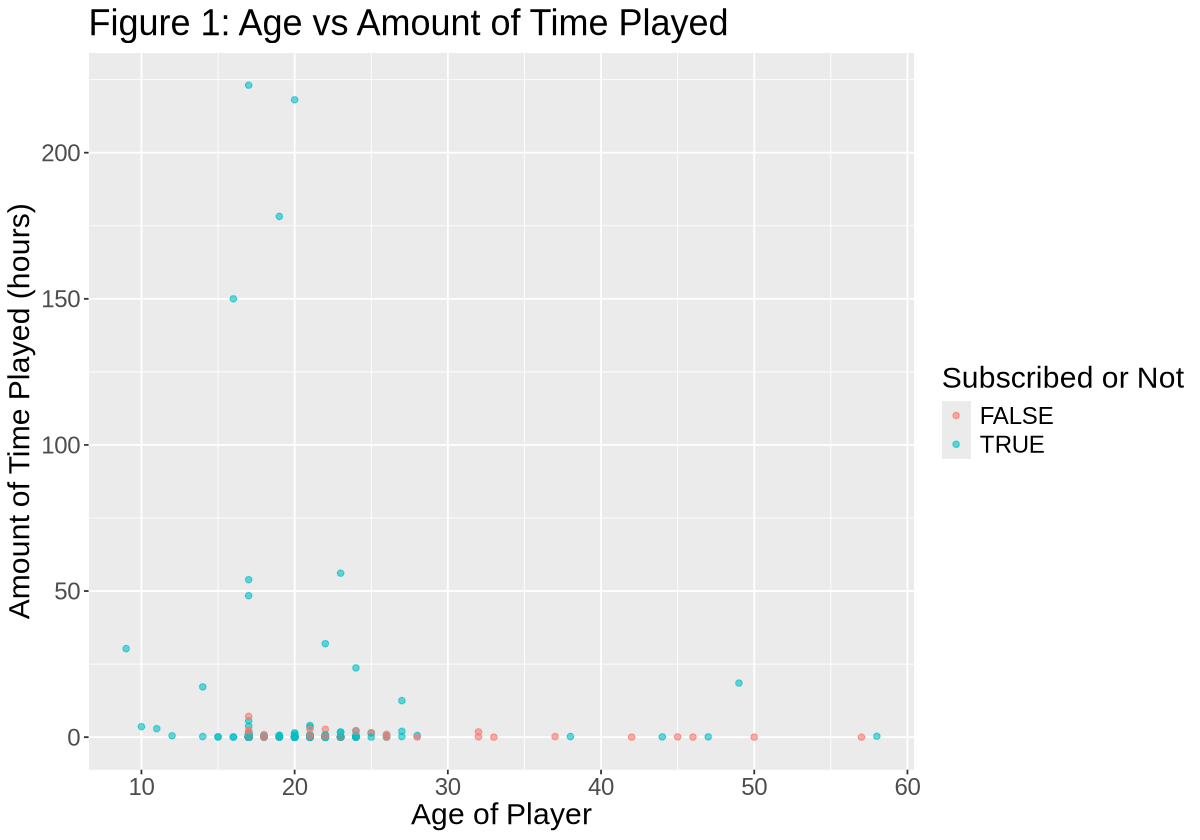

In [11]:
options(repr.plot.width = 10, repr.plot.height = 7)

players_scatter_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Age of Player",
         y = "Amount of Time Played (hours)",
         color = "Subscribed or Not",
         title = "Figure 1: Age vs Amount of Time Played") +
    theme(text = element_text(size = 18))
players_scatter_plot

Notes:

- Most of the points are near the bottom of the graph (a majority of the players have spent less than 25 hours playing on the server).
- All the players that have spent many hours on the server are subscribed (weak positive relationship).

Let's focus on each individual variable for the next few graphs to see each predictor's contribution.

#### **Graph 2: Subscription Status Visual**

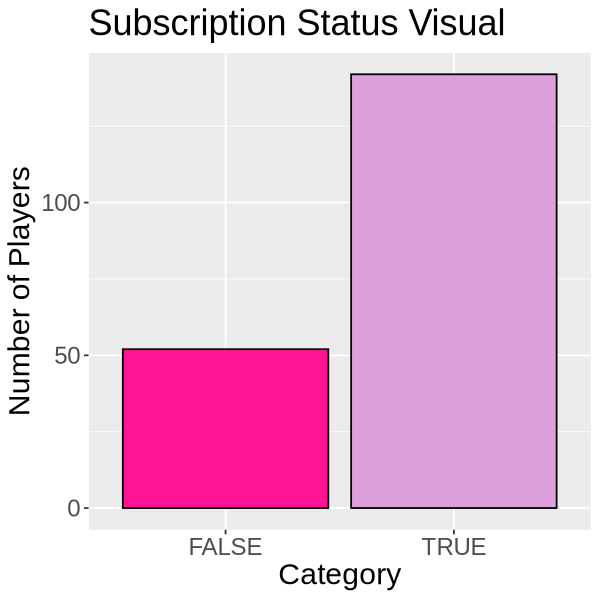

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)

subscription_status_visual <- ggplot(clean_players, aes(x = subscribe)) + 
    geom_bar(fill = c("deeppink", "plum"),
            color = "black", linewidth = 0.5) + 
    ggtitle("Subscription Status Visual") + 
    xlab("Category") + 
    ylab("Number of Players") +
    theme(text = element_text(size = 18))
    
subscription_status_visual

Notes:
- The majority of players are *subscribed*.

#### **Graph 3: Histogram of Hours Played**

In [13]:
range(players$`played_hours`, na.rm = TRUE)

[1]   0.0 223.1

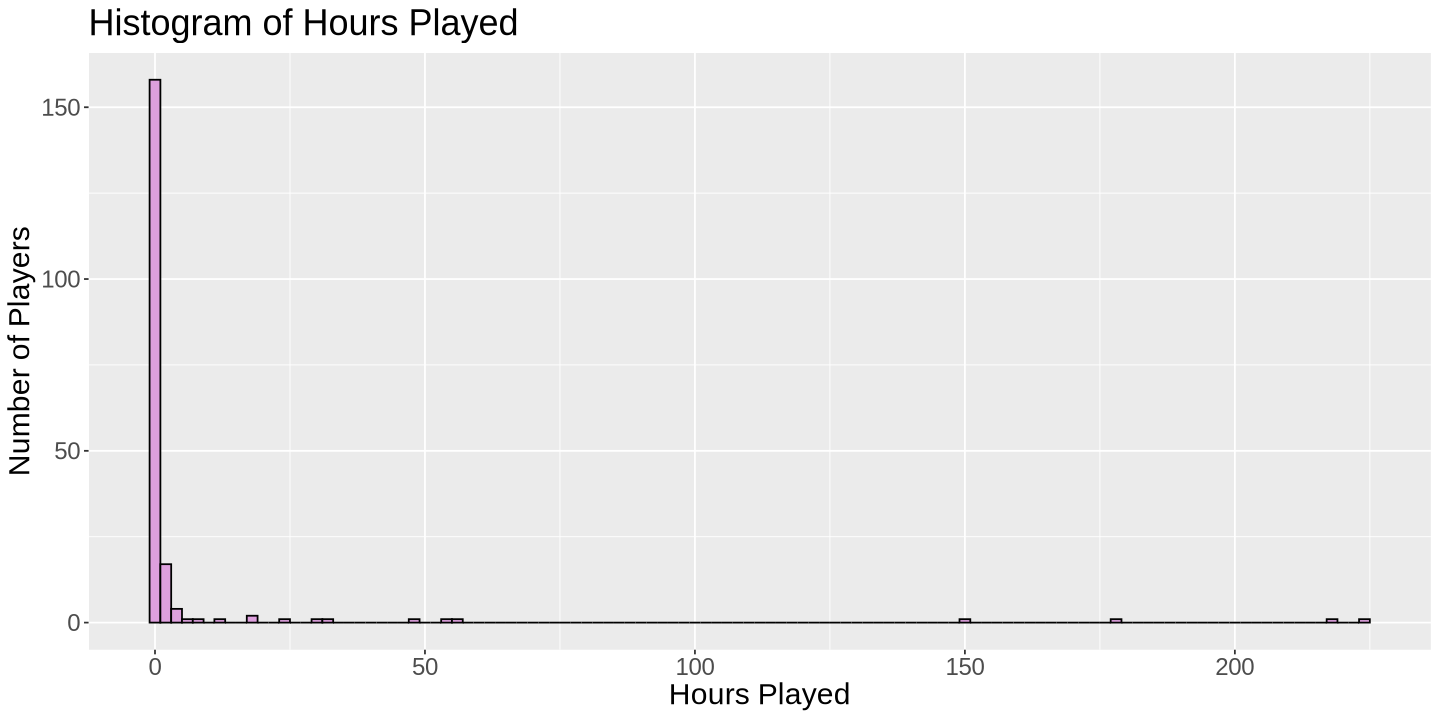

In [14]:
options(repr.plot.width = 12, repr.plot.height = 6)

hours_played_histogram <- ggplot(clean_players, aes(x = played_hours)) + 
    geom_histogram(binwidth = 2, fill = "plum", color = "black") + 
    ggtitle("Histogram of Hours Played") + 
    xlab("Hours Played") + 
    ylab("Number of Players") +
    theme(text = element_text(size = 18))
hours_played_histogram

Notes:
- Most of the observations in the Histogram of Hours Played are in the 3 bins.

The histogram below was created to zoom in on where the majority of the observations lie for a closer look. 

#### **Graph 4: Histogram of Hours Played (0 to 4 Hours)**

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


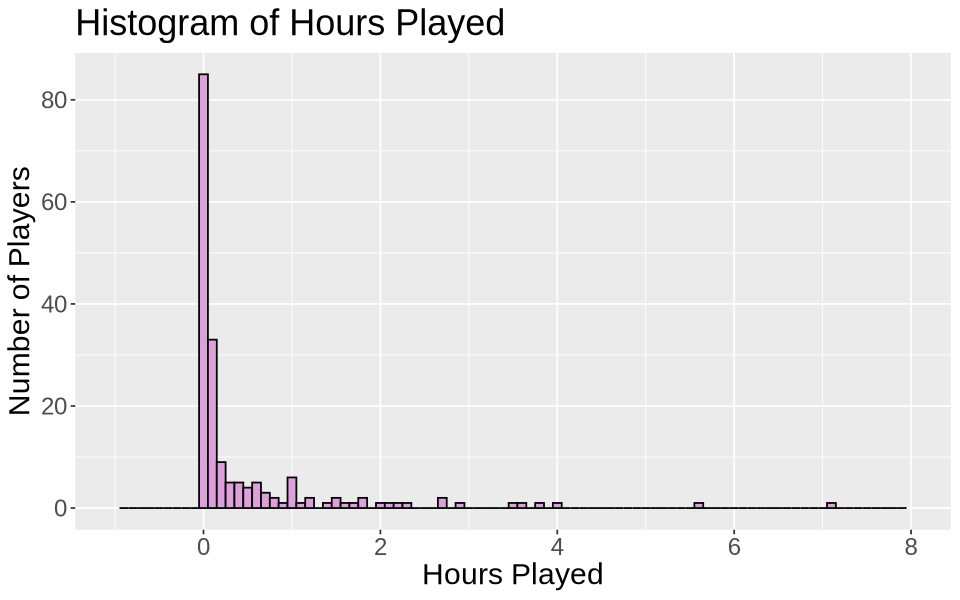

In [15]:
options(repr.plot.width = 8, repr.plot.height = 5)

hours_played_histogram_zoomed <- ggplot(clean_players, aes(x = played_hours)) + 
    geom_histogram(binwidth = 0.1, fill = "plum", color = "black") + 
    ggtitle("Histogram of Hours Played") + 
    xlab("Hours Played") + 
    ylab("Number of Players") +
    theme(text = element_text(size = 18)) + 
    xlim(c(-1,8))
hours_played_histogram_zoomed

Notes:
- Most of the players have spend less than 1 hour (even mostly under 0.2 hour) on the MineCraft server.

#### **Graph 5: Age by Subscription Status**

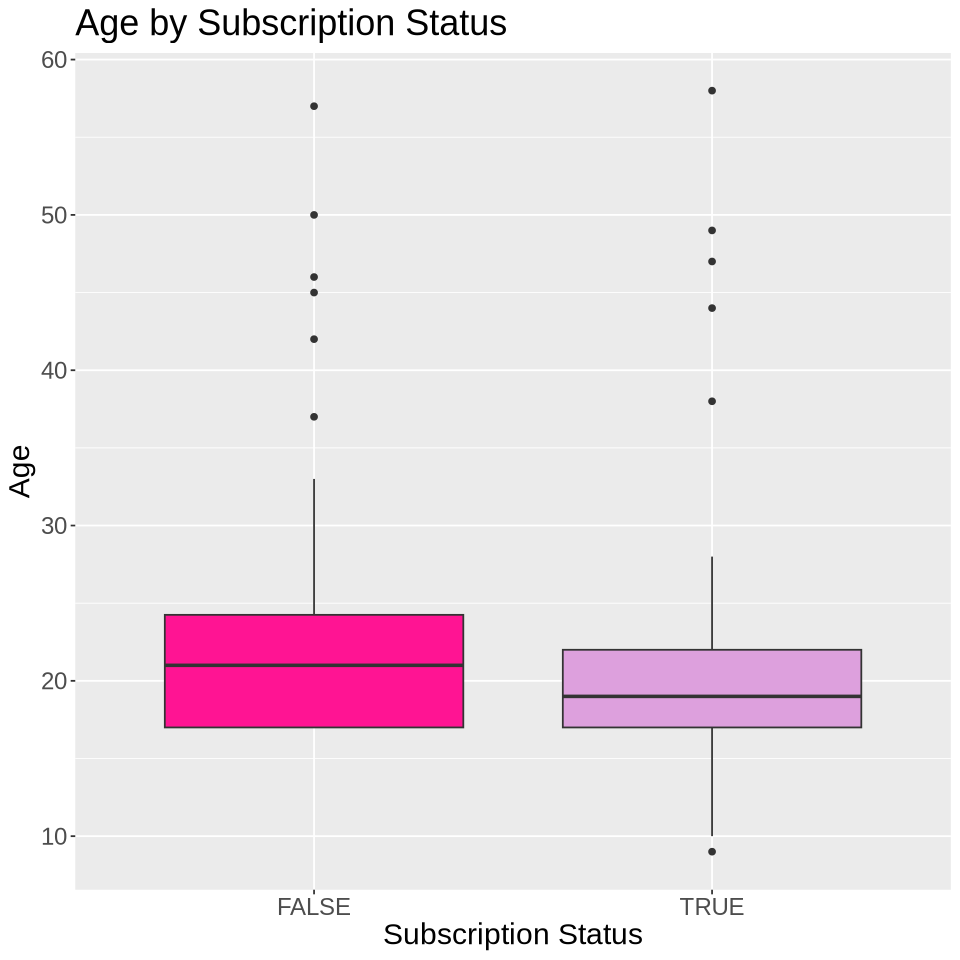

In [16]:
options(repr.plot.width = 8, repr.plot.height = 8)

box_plot_age_sub <- ggplot(clean_players, aes(x = subscribe, y = Age)) +
    geom_boxplot(fill = c("deeppink", "plum")) +
    ggtitle("Age by Subscription Status") +
    xlab("Subscription Status") + 
    ylab("Age") +
    theme(text = element_text(size = 18))
box_plot_age_sub

Notes:
- There is no significant difference between the ages of people who subscribe to the newsletter and those who do not, since there is a considerable overlap in the error bars.
    - This suggests that age does not play an important role in predicting subscription.
- In both groups, a majority of the players are around the 20-years-old mark.

#### **Supplementary Graph 1: Log transformations**

The following graph was created to further explore Graph 1. There are some outliers (some players played many hours) and log transformations can help resolve that and give us some more insight.

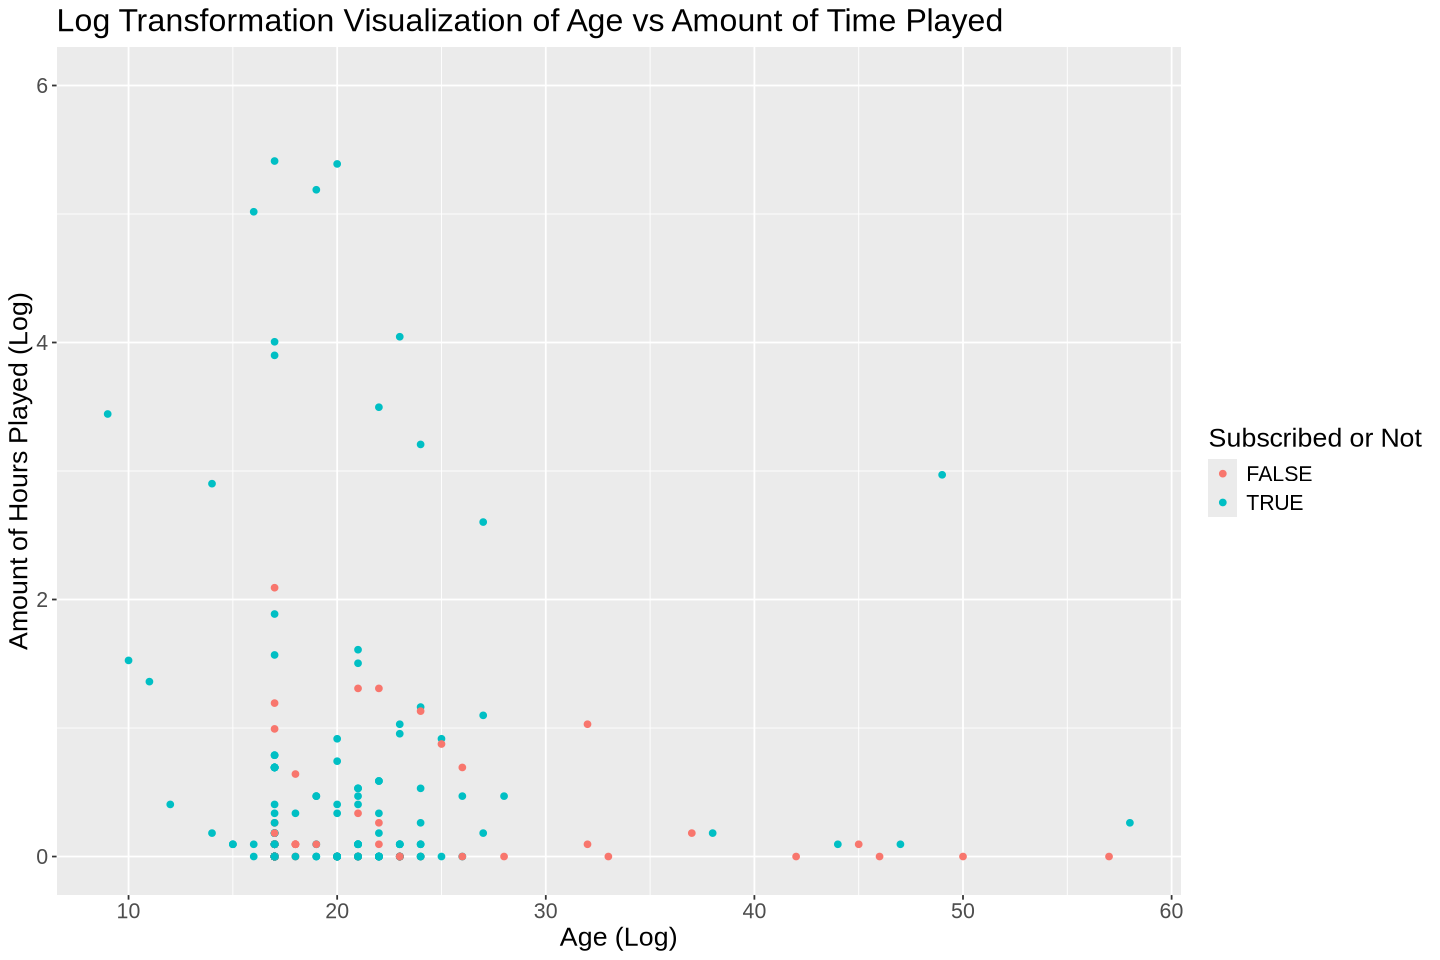

In [17]:
# log transformations

log_clean_players <- clean_players |>
    mutate(log_played_hours = log(played_hours + 1))

options(repr.plot.width = 12, repr.plot.height = 8)

log_plot <- ggplot(log_clean_players, aes(x = Age, y = log_played_hours, color = subscribe)) + 
    geom_point() + 
    ggtitle("Log Transformation Visualization of Age vs Amount of Time Played") + 
    xlab("Age (Log)") + 
    ylab("Amount of Hours Played (Log)") + 
    labs(color = "Subscribed or Not") + 
    ylim(c(-0, 6)) + 
    theme(text = element_text(size = 16))
log_plot

Notes:
- The majority of the players are in the 10-30 year old range subscribed (TRUE).
- For this video game, it makes sense that people within a younger age bracket would make up the majority of the observations. 

In [18]:
# count_above_20_hours <- clean_players |>
#     filter(played_hours > 20) |>
#     nrow()
# count_above_20_hours

# output = 10

**Conclusion:** 
Based on the above exploration, we have decided to exclude outliers above 20 hours. Since the original players dataset is fairly large (196 observations) and only 10 players have spent more than 20 hours gaming (all of which subscribed), we expect that removing these outliers will not have a drastic impact on our analysis.

In [19]:
clean_players <- clean_players |>
    filter(played_hours < 20)

# Data Analysis (K-NN classification)

For our data analysis, we chose to do K-NN classification to predict whether a gamer is a subscriber of the newsletter. We used the predictors "Age" and "played_hours". 

The advantages of using K-NN classification are that it is easy to interpret, models non-linear relations, and does not require strict statistical assumptions. On the other hand, outliers may pose a challenge because of the large variation in distance, but this should not be an issue since we have filtered them out.

In [20]:
# set the seed
set.seed(1234)

We split the data using a 0.75 proportion, using 75% of the data to train the model, while reserving 25% for the final test set. We chose to use 5-fold cross validation on the training set to help prevent overfitting. 5-fold was chosen in particular because if we used 10-fold, then each fold would only have about 15 people in it, which is too little to get a reliable accuracy percentage. Using 5-fold leaves roughly 30 people in each fold, providing a better estimate for the accuracy of the model.

In [21]:
# splitting and creating folds
players_split <- initial_split(clean_players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)
players_folds <- vfold_cv(players_train, v = 5, strata = subscribe)

In [22]:
# scaling and centering
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [23]:
# model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [24]:
# workflow
knn_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec)

In [26]:
# tuning
knn_tune <- tune_grid(knn_workflow, resamples = players_folds, grid = 10)
knn_metrics <- collect_metrics(knn_tune)
knn_metrics

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.4285714,5,0.04656573,Preprocessor1_Model1
2,roc_auc,binary,0.4794220,5,0.05336668,Preprocessor1_Model1
3,accuracy,binary,0.5005495,5,0.02545326,Preprocessor1_Model2
3,roc_auc,binary,0.5111607,5,0.03757592,Preprocessor1_Model2
5,accuracy,binary,0.5659341,5,0.03517127,Preprocessor1_Model3
5,roc_auc,binary,0.5078900,5,0.04127928,Preprocessor1_Model3
6,accuracy,binary,0.5730769,5,0.03244318,Preprocessor1_Model4
6,roc_auc,binary,0.5102538,5,0.04615043,Preprocessor1_Model4
8,accuracy,binary,0.5873626,5,0.04483496,Preprocessor1_Model5


The K-value of 13 was chosen because it has the highest mean accuracy at ~0.739.

In [27]:
# training final model updated with the best K value (13)
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |> 
  set_engine("kknn") |> 
  set_mode("classification")

# fit the final workflow to the training data
knn_fit <- workflow() |> 
  add_recipe(players_recipe) |> 
  add_model(knn_spec_final) |> 
  fit(data = players_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2608696
Best kernel: rectangular
Best k: 13

In [28]:
# use the trained model to predict labels for the test set
players_pred <- predict(knn_fit, new_data = players_test)

# combine predictions with test data
players_results <- bind_cols(players_test, players_pred)

# calculate the accuracy
metrics(players_results, truth = subscribe, estimate = .pred_class)

# confusion matrix
conf_mat(players_results, truth = subscribe, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6956522
kap,binary,0.0773639


          Truth
Prediction FALSE TRUE
     FALSE     2    3
     TRUE     11   30

This confusion matrix helps us clear up the specific errors made by the classifier. The diagonal values (the top left and the
bottom right) represent correct predictions. The top left shows true negatives (non-subscribers correctly predicted), while
the bottom right shows true positives (subscribers correctly predicted). The top right shows false positives (non-subscribers incorrectly predicted as subscribers), while the bottom left shows false negatives (subscribers that the model didn't predict).

In [29]:
# evaluating classifer accuracy
players_accuracy |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# accuracy = number of correct predictions / number of total predictions
# accuracy = (30 + 2) / (2 + 3 + 11 + 30) = 32/46 = 0.696

ERROR: Error in eval(expr, envir, enclos): object 'players_accuracy' not found


Looking at the confusion matrix and what was given above by metrics, the accuracy of our classifier seems fairly low, at 69.6%. However, this is fine, because we had determined previously in our exploratory analysis that hours_played and especially Age are not particularly good predictors for subscibe due to weak correlation.

In [30]:
# classifier precision
# precision = number of correct positive (TRUE) predictions / total number of positive predictions
# precision = (30) / (11 + 30) = 30/41 = 0.732

The precision of the classifier is moderately high, with 73.2% of the predictions for players that *did* subscribe were actually TRUE. Therefore, if a new observation was classified as TRUE, we can be moderately certain that it is indeed TRUE for subscribe.

In [31]:
# classifier recall
# recall = number of correct positive predictions / total number of positive observations
# recall = (30) / (30 + 3) = 0.909

The recall of the classifier is high, with 90.9% of actual TRUE observations being identified. Therefore, we can trust this classifer to find players who *have* subcribed to the newsletter.

# Analysis Visualization

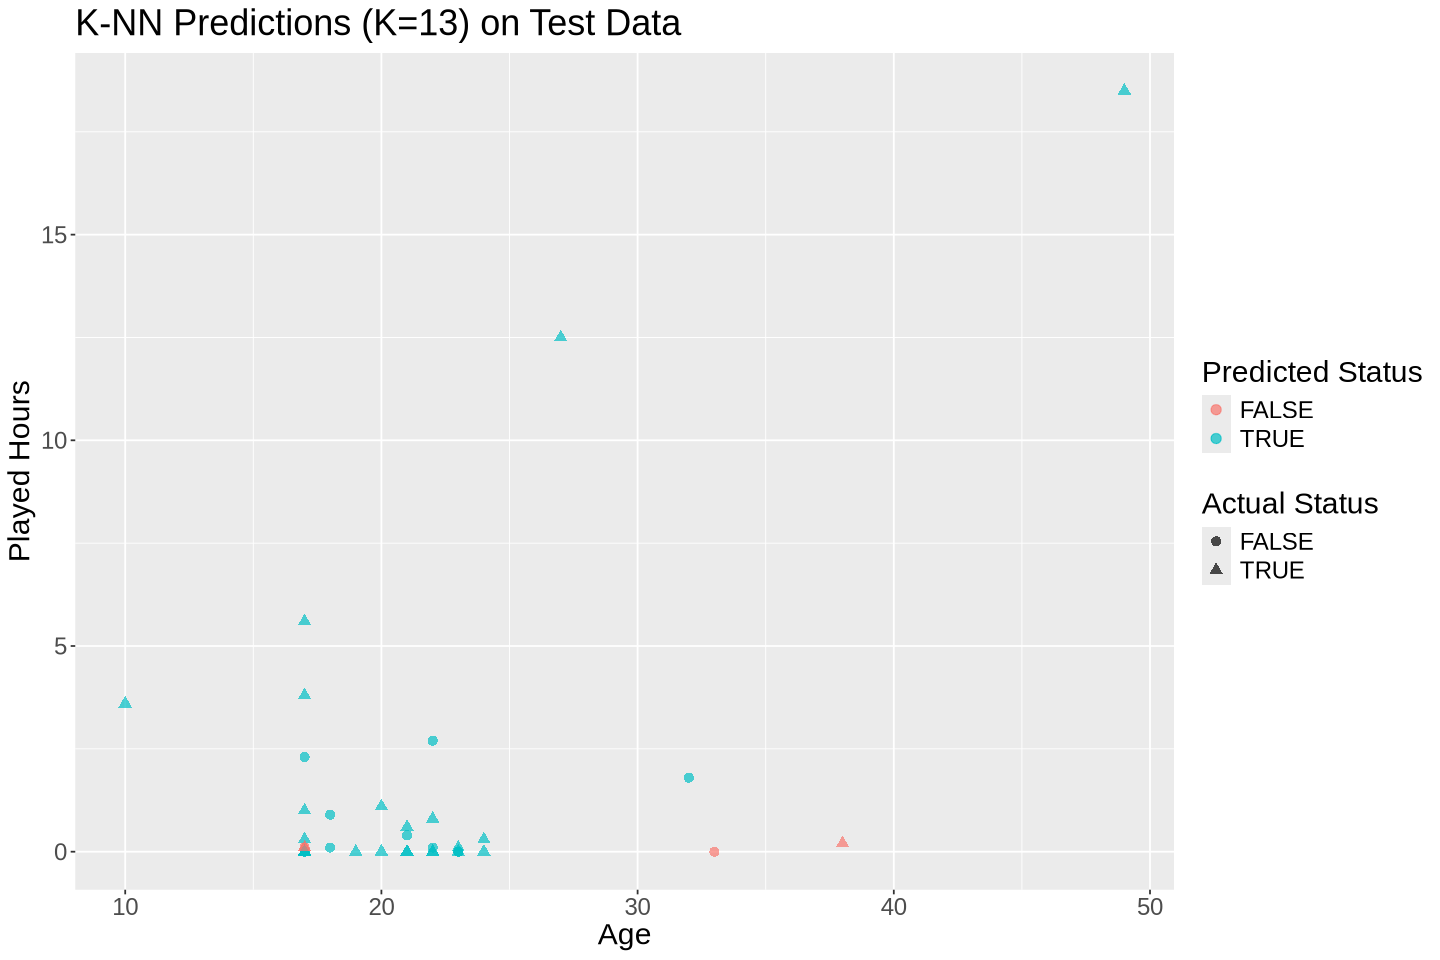

In [33]:
# visualization

options(repr.plot.width = 12, repr.plot.height = 8)

final_players_plot <- ggplot(players_results, aes(x = Age, y = played_hours, color = .pred_class, shape = subscribe)) +
  geom_point(alpha = 0.7, size = 2.5) +
  labs(title = "K-NN Predictions (K=13) on Test Data",
       x = "Age", 
       y = "Played Hours",
       color = "Predicted Status", 
       shape = "Actual Status") + 
  theme(text = element_text(size = 18))
final_players_plot

**Discussion:**
-
- discuss what impact could such findings have
- discuss what future questions could this lead to

Summary:

- The majority of observations (points on the graph) lie within the range of ages 10 to 30, which indicates this age subset of the population is more likely to engage with video game activities.
- There is a higher proportion of subscribed gamers in this dataset as opposed to unsubscribed. This could mean that the likelyhood of a person playing video games could have a positive correlation with subscription status.
- As the amount of hours recorded gaming in the observations increase, the subscribed observations dominates. This predicts a positive correlation between the amount of hours spent on the server and the respective player's subscription status.

The data analysis and the final visualization provide some deeper insight into the relationship between the two quantitative variables, Age and Played Hours. The analysis also included Subscription Status (qualitative) as the third variable. The visualization was helpful for observing the relationship between the three variables that the data analysis found.

From the final visualization above, there are a few **key observations**:

- The majority of the observations were predicted as TRUE (has subscribed) even though roughly half of the observations have actually *not* subscribed (triangles).
- The classifier seems to correlate that players that did not subscribe all have spent little time on the server (orange).
    - There may be a weak positive correlation between hours played and subscription status. As hours_played increases, players tend to subscribe.
- The correlation between age and subscription status is very weak.

Comparing these data analysis results to our expectations from exploratory analysis, the final plot between the three variables were similar to our expectations. As seen in Graph 1 in the exploratory analysis, we had expected a weak correlation between age and subscription status, and a possible positive correlation between hours played and subscription status.

For this K-NN classification, it was observed that players who played less were difficult to classify into the respective groups. For this study, K-NN classification appears to be satisfactory, but it might provide more accurate results if additional variables were incorporated. For future research, we may consider including other variables, like level of experience, gender, etc., which may have greater impacts on predicting subscription status. Additional insights can be gathered from analyses of playtime data over the period before players subscribe.

Playtime's influence on subscription status suggests that increasing engagement levels could be important for getting new subscribers. Knowing this information, the developer can craft advertisements or create attractive in-game events to tailor for player retention so people spend a longer time on ther server. The developer can create incentives to draw in players who may be less inclined to join the server and are less likely to subscribe.

**References**
-

    Holtz, Y. Boxplot with individual data points. The R Graph Gallery. https://r-graph-gallery.com/89-box-and-scatter-plot-with-ggplot2.html.